In [17]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [64]:
stock_information = yf.download('KO', start = '2000-07-15', end = '2020-07-14')
stock_information.dropna()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-07-17,28.812500,28.812500,28.281250,28.671875,12.183752,7003000.0
2000-07-18,28.671875,29.375000,28.312500,29.093750,12.363021,7595200.0
2000-07-19,29.375000,30.312500,29.375000,30.250000,12.854351,16435400.0
2000-07-20,30.250000,30.343750,29.937500,30.250000,12.854351,9225600.0
2000-07-21,30.250000,30.625000,30.179688,30.429688,12.930712,8141200.0
...,...,...,...,...,...,...
2020-07-07,45.000000,45.500000,44.799999,45.209999,44.846973,13043600.0
2020-07-08,45.139999,45.180000,44.470001,45.070000,44.708099,13851200.0
2020-07-09,45.049999,45.049999,43.830002,43.910000,43.557415,16087100.0


In [76]:
# List where we will keep track of long and short average points
indicators = pd.DataFrame(index=stock_information.index)
# 50 day
short_window = 50
# 200 day
long_window = 200
# Exponential moving averages using the closing data
indicators['short_avg'] = stock_information['Close'].ewm(span=50, adjust=False).mean()
indicators['long_avg'] = stock_information['Close'].ewm(span=200, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

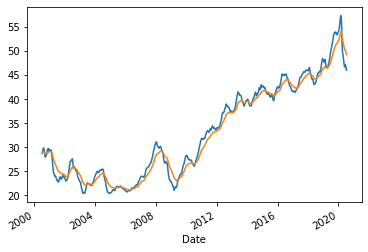

In [79]:
indicators['short_avg'].plot()
indicators['long_avg'].plot()

In [82]:
indicators['long_avg']

Date
2000-07-17    28.671875
2000-07-18    28.676073
2000-07-19    28.691734
2000-07-20    28.707239
2000-07-21    28.724378
                ...    
2020-07-07    49.381177
2020-07-08    49.338280
2020-07-09    49.284267
2020-07-10    49.243130
2020-07-13    49.203398
Name: long_avg, Length: 5030, dtype: float64

In [81]:
indicators['short_avg']

Date
2000-07-17    28.671875
2000-07-18    28.688419
2000-07-19    28.749658
2000-07-20    28.808495
2000-07-21    28.872071
                ...    
2020-07-07    46.200149
2020-07-08    46.155829
2020-07-09    46.067758
2020-07-10    46.031767
2020-07-13    46.001110
Name: short_avg, Length: 5030, dtype: float64

In [87]:
a = np.where(indicators['short_avg'] > indicators['long_avg'], 1.0, 0.0) 
num = len(a)
for i in range (5030):
    if a[i] == True:
        print(f'{stock_information.index[i]}    BAJA')
    if a[i] == False:
        print(f'{stock_information.index[i]}    SUBE')

2000-07-17 00:00:00    SUBE
2000-07-18 00:00:00    BAJA
2000-07-19 00:00:00    BAJA
2000-07-20 00:00:00    BAJA
2000-07-21 00:00:00    BAJA
2000-07-24 00:00:00    BAJA
2000-07-25 00:00:00    BAJA
2000-07-26 00:00:00    BAJA
2000-07-27 00:00:00    BAJA
2000-07-28 00:00:00    BAJA
2000-07-31 00:00:00    BAJA
2000-08-01 00:00:00    BAJA
2000-08-02 00:00:00    BAJA
2000-08-03 00:00:00    BAJA
2000-08-04 00:00:00    BAJA
2000-08-07 00:00:00    BAJA
2000-08-08 00:00:00    BAJA
2000-08-09 00:00:00    BAJA
2000-08-10 00:00:00    BAJA
2000-08-11 00:00:00    BAJA
2000-08-14 00:00:00    BAJA
2000-08-15 00:00:00    BAJA
2000-08-16 00:00:00    BAJA
2000-08-17 00:00:00    BAJA
2000-08-18 00:00:00    BAJA
2000-08-21 00:00:00    BAJA
2000-08-22 00:00:00    BAJA
2000-08-23 00:00:00    BAJA
2000-08-24 00:00:00    BAJA
2000-08-25 00:00:00    BAJA
2000-08-28 00:00:00    BAJA
2000-08-29 00:00:00    BAJA
2000-08-30 00:00:00    BAJA
2000-08-31 00:00:00    BAJA
2000-09-01 00:00:00    BAJA
2000-09-05 00:00:00 